<a href="https://colab.research.google.com/github/m-dergacheva/Yandex-Practicum_DA/blob/main/Yandex_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D0%B0_%D0%BF%D1%80%D0%BE%D0%BA%D1%82%D0%B0_%D1%81%D0%B0%D0%BC%D0%BE%D0%BA%D0%B0%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import scipy.stats as st
import numpy as np

In [2]:
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving rides_go.csv to rides_go.csv
Saving subscriptions_go.csv to subscriptions_go.csv
Saving users_go.csv to users_go.csv


### Исследование для сервиса аренды самокатов GoFast

**Описание:** Были переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  
с подпиской Ultra  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно.    
**Цель исследования:** Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской.  
**Задачи:**
**1. Загрузка данных и изучение общей информации:**
- [X] Открыть файл с данными. Изучить "содержимое" и суть данных (каждого столбца и значения строк)
- [X] Проанализировать данные на предмет "аномальных" и "ошибочных" данных (неверное содержимое ячеек, например, не подходящее по сути слобца и т.д.)
- [X] Проанализировать типы данных

**2. Выполнение предобработки данных:**
- [X] Проанализировать данные на предмет пропусков, в т.ч. причин появления таких пропусков и при необходимости их обработать ( заполнить, удалить, поставить "заглушки" и т.д.)
- [X] Проанализировать данные на предмет дубликатов. Оценить причины появления таких дубликатов, при необходимости обработать такие данные.
- [X] Привести столбец date к типу даты pandas.
- [X] Создать новый столбец с номером месяца на основе столбца date

**3. Анализ данных:**
- [X] Описать и визуализируйте общую информацию о пользователях и поездках:
-- частота встречаемости городов;  
-- соотношение пользователей с подпиской и без подписки;  
-- возраст пользователей;  
-- расстояние, которое пользователь преодолел за одну поездку;  
-- продолжительность поездок.  

**4. Объединение данных:**
- [X] Объедините данные о пользователях, поездках и подписках в один датафрейм.
- [X] Создайте ещё два датафрейма из датафрейма:
-- c данными о пользователях без подписки;  
-- с данными о пользователях с подпиской.  
- [X] Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий  

**Шаг 5. Подсчёт выручки:**
- [X] Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- [X] Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.  

**Шаг 6. Проверка гипотез:**  
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.  
- [X] Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- [X] Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- [X] Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- [X] Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

#### Описание данных
**Пользователи — users_go.csv**  
user_id	уникальный идентификатор пользователя  
name	имя пользователя  
age	возраст  
city	город  
subscription_type	тип подписки (free, ultra)  

**Поездки — rides_go.csv**  
user_id	уникальный идентификатор пользователя  
distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)  
duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
date	дата совершения поездки  

**Подписки — subscriptions_go.csv**  
subscription_type	тип подписки  
minute_price	стоимость одной минуты поездки по данной подписке  
start_ride_price	стоимость начала поездки  
subscription_fee	стоимость ежемесячного платежа  

#### Шаг 1. Загрузка данных

In [3]:
#открытие и запись файл
try:
    users=pd.read_csv('/content/users_go.csv') # Пользователи
    rides=pd.read_csv('/content/rides_go.csv',parse_dates=['date'], dayfirst=True) # Поездки
    subscriptions=pd.read_csv('/content/subscriptions_go.csv') # Подписки
except:
    users=pd.read_csv('C:/Users/Рита/Desktop/Yandex/project1210/users_go.csv') # Пользователи
    rides=pd.read_csv('C:/Users/Рита/Desktop/Yandex/project1210/rides_go.csv',parse_dates=['date'], dayfirst=True) # Поездки
    subscriptions=pd.read_csv('C:/Users/Рита/Desktop/Yandex/project1210/subscriptions_go.csv') # Подписки
#ниже добавлена ссылка для моей локальной работы

In [4]:
#первый просмотр сета данных
def first_look (data):
    print('Первые 10 строк')
    display(data.head(10))
    print('Типы данных\n')
    display(data.info())
    print('Статистика.Сводка')
    display(data.describe())
    print('Пропуски:\n')
    display(data.isna().sum())
    print('\n Процент пропусков')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДубликаты:\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [5]:
first_look (users)

Первые 10 строк


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

Статистика.Сводка


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Пропуски:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


 Процент пропусков


user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64


Дубликаты:

Дубликатов:  31


In [6]:
first_look (rides)

Первые 10 строк


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

Статистика.Сводка


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Пропуски:



user_id     0
distance    0
duration    0
date        0
dtype: int64


 Процент пропусков


user_id     0.0
distance    0.0
duration    0.0
date        0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [7]:
first_look (subscriptions)

Первые 10 строк


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

Статистика.Сводка


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Пропуски:



subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


 Процент пропусков


subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


**Вывод:**  
Представлено 3 сета с данными. При предварительном просмотре, выявлено, что во всех сетах отсутствуют пропущенные значения. Дубликаты обнаружены только в сете users.

#### Шаг 2. Предобработка данных

In [8]:
# до всевозможных преобразований предлагается сделать копию датасета для работы с копией
utemp = users.copy()
rtemp = rides.copy()

In [9]:
#вывоб дубликатов в users
display(users[users.duplicated(subset=['user_id','name','subscription_type'])].head())

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free


In [10]:
#удаление дубликатов с сохранением первой записи
users = users.drop_duplicates(subset=['user_id'], keep='first')

In [11]:
# сравнение объемов данных до и после преобразования
a, b = len(users), len(utemp)
print(len(users), len(utemp), round((a-b)/a*100, 2))

1534 1565 -2.02


In [12]:
#отображение "начинки" столбца date в сете rides
display(rides['date'].value_counts())

2021-12-22    72
2021-01-12    70
2021-12-27    69
2021-06-09    67
2021-08-20    67
              ..
2021-11-07    35
2021-07-30    35
2021-02-02    34
2021-12-15    34
2021-07-03    31
Name: date, Length: 364, dtype: int64

In [13]:
rides['year']=rides['date'].dt.year
display(rides['year'].value_counts())

2021    18068
Name: year, dtype: int64

In [14]:
rides=rides.drop(columns='year')
display(rides.head())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Очевидно, что в сете данные представлены только за 2021 год, соответственно вычленение месяцев возможно без "путаницы" данных.

In [15]:
#создание столбца с номером месяца на основе столбца date
rides['num_month']=rides['date'].dt.month

In [16]:
#проверка на наличие возможных аномалий в rides
fig = go.Figure()
fig.add_trace(go.Box(y=rides['distance'],name='Расстояние, которое пользователь проехал в текущей сессии (в метрах)'))

fig.update_layout(title="Выявление аномальных значений",
                  xaxis_title="Значение",
                  yaxis_title="Значение",
                 height=500, width=500,)

fig.show()

In [17]:
#проверка на наличие возможных аномалий в rides
fig = go.Figure()
fig.add_trace(go.Box(y=rides['duration'],name='продолжительность сессии (в минутах)'))

fig.update_layout(title="Выявление аномальных значений",
                  xaxis_title="Значение",
                  yaxis_title="Значение",
                 height=500, width=500,)

fig.show()

In [18]:
# сравнение объемов данных до и после преобразования
a, b = len(rides), len(rtemp)
print(len(rides), len(rtemp), round((a-b)/a*100, 2))

18068 18068 0.0


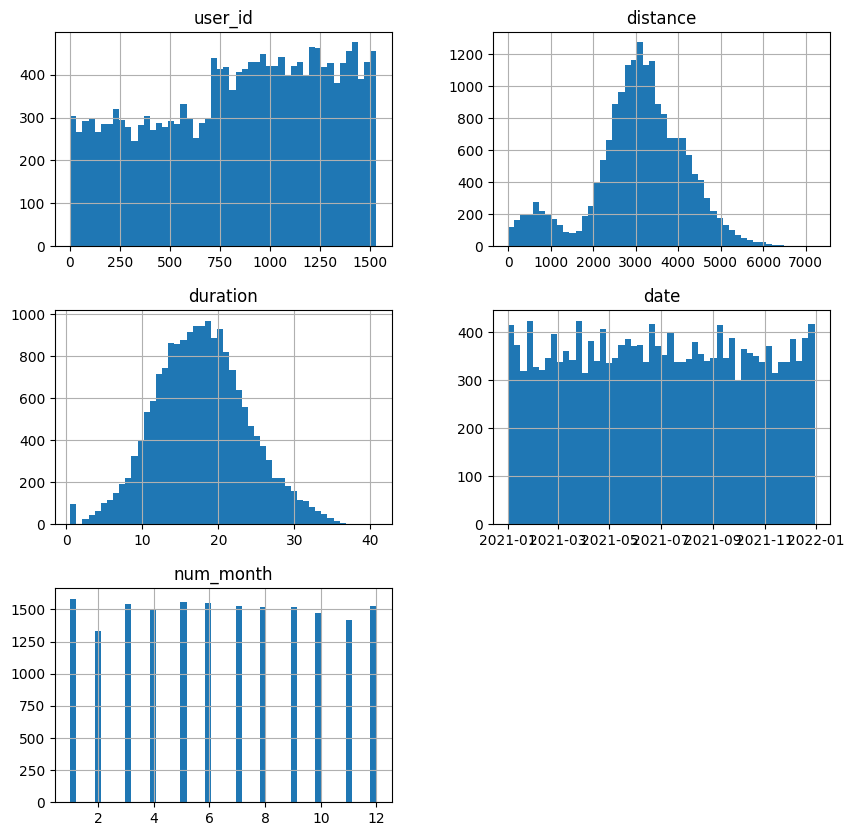

In [19]:
# вывод первых графиков для вывода возможных "аномалий" в данных
rides.hist(figsize=(10,10), bins=50)
plt.show()

**Вывод:**  
Были проанализированы и исключены дубликаты в сете users. Выявлены и обработаны аномалии в сете rides ( было допущено, что поездка не может быть меньше 1 минуты и меньше 150 метров). После всех преобразований произведены сравнения объемов сетов "до/после" обработки, для выявления критичности отсечения данных.  
Данные date были переведы в соответствующий формат, и добавлен номер месяца.

#### Шаг 3. Исследовательский анализ данных

In [20]:
#частота встречаемости городов;
i=users.pivot_table(index='city', aggfunc='count', values='user_id').sort_values(by='user_id', ascending=False)
#соотношение пользователей с подпиской и без подписки
j=users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
j['percent']=(j['user_id']/j['user_id'].sum()*100).round(5)
#возраст пользователей
z=users.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='user_id',ascending=False)
#расстояние, которое пользователь преодолел за одну поездку
h=rides.groupby('num_month')['distance'].agg({'median'})
#продолжительность поездок
k=rides.groupby('num_month')['duration'].agg({'median'})

In [21]:
#частота встречаемости городов;
# строим столбчатую диаграмму
fig = px.bar(i, # загружаем данные и заново их сортируем
             x=i.index, # указываем столбец с данными для оси X
             y=i['user_id'], # указываем столбец с данными для оси Y
             text=i['user_id'] # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Частота встречаемости городов',
                   xaxis_title='Города',
                   yaxis_title='Частота встречаемости')
fig.update_xaxes(tickangle=45)
fig.show() # выводим график

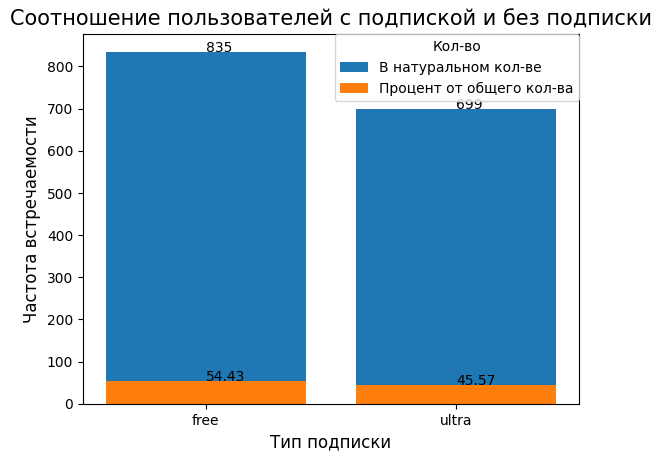

In [22]:
#соотношение пользователей с подпиской и без подписки
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

def per_addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],"{:.2f}".format(y[i]))
#plt.text(i,y[i],f"{y[i]:.1%}")

plt.bar(j.index, j['user_id'], label='В натуральном кол-ве')
addlabels(j.index, j['user_id'])

plt.bar(j.index, j['percent'],  label='Процент от общего кол-ва')
per_addlabels(j.index, j['percent'])

plt.legend(title='Кол-во', loc='upper right', borderaxespad=0)
plt.title("Соотношение пользователей с подпиской и без подписки",fontsize=15)

plt.xlabel("Тип подписки",fontsize=12)
plt.ylabel("Частота встречаемости",fontsize=12)

plt.show()

In [23]:
#изображение круговой диаграммы
name_category = j.index
values = j['user_id']

fig = go.Figure(data=[go.Pie(labels=name_category, values=values,hole=0.4)])

fig.update_layout(title='Результаты количества пользователей по типу подписки',
                 height=450, width=600)

fig.update_traces(hoverinfo='label+percent+value', textinfo='value+percent', textfont_size=10)
fig.show()

In [24]:
#возраст пользователей
fig = px.bar(z, # загружаем данные и заново их сортируем
             x=z.index, # указываем столбец с данными для оси X
             y=z['user_id'], # указываем столбец с данными для оси Y
             text=z['user_id'] # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Частота встречаемости возрастов',
                   xaxis_title='Возраст',
                   yaxis_title='Частота встречаемости')
fig.update_xaxes(tickangle=45)
fig.show() # выводим график

In [25]:
#расстояние, которое пользователь преодолел за одну поездку
fig = px.line(h, x=h.index, y='median', markers=True)

fig.update_layout(title='Медианное расстояние, которое пользователь преодолел за одну поездку (вид 1)',
                   xaxis_title='Месяца',
                   yaxis_title='Медианное значение расстояния')

fig.show()

In [26]:
#расстояние, которое пользователь преодолел за одну поездку
fig = px.line(h, x=h.index, y='median', markers=True)

fig.update_layout(title='Медианное расстояние, которое пользователь преодолел за одну поездку (вид 2)',
                   xaxis_title='Месяца',
                   yaxis_title='Медианное значение расстояния')
fig.update_yaxes(range = [3000,3200])

fig.show()

In [27]:
#расстояние, которое пользователь преодолел за одну поездку
fig = px.line(h, x=h.index, y='median', markers=True)

fig.update_layout(title='Медианное расстояние, которое пользователь преодолел за одну поездку (вид 3)',
                   xaxis_title='Месяца',
                   yaxis_title='Медианное значение расстояния')
fig.update_yaxes(range = [0,3400])

fig.show()

In [28]:
#продолжительность поездок
fig = px.line(k, x=k.index, y='median', markers=True)

fig.update_layout(title='Медианная продолжительность поездок',
                   xaxis_title='Месяца',
                   yaxis_title='Медианное значение продолжительности')

fig.show()

<ipython-input-29-d1e7e15c3544>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



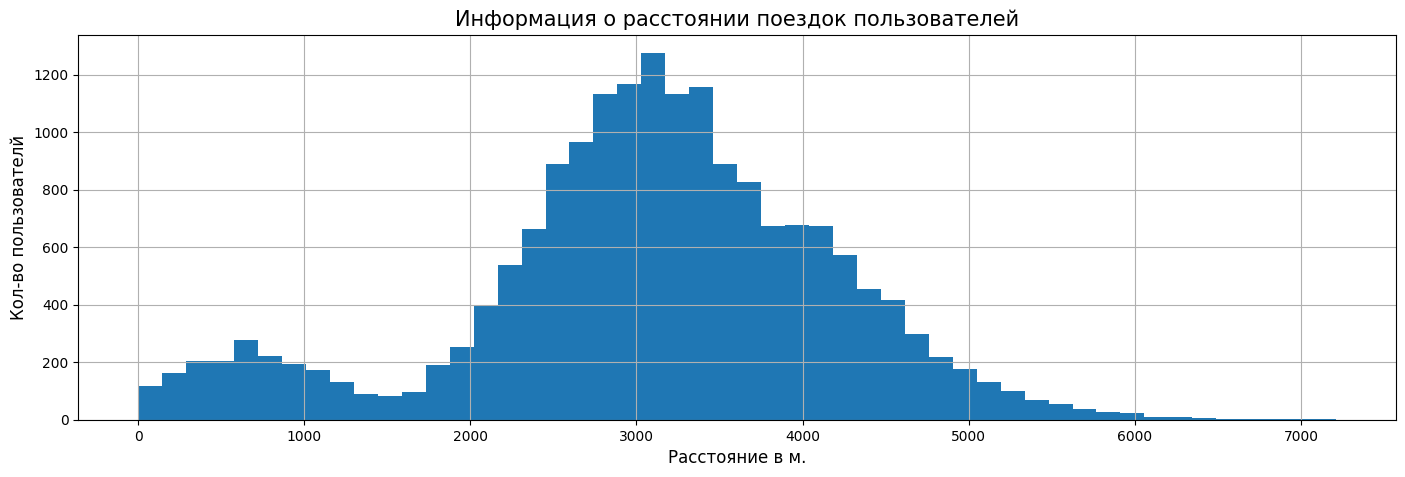

<ipython-input-29-d1e7e15c3544>:12: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



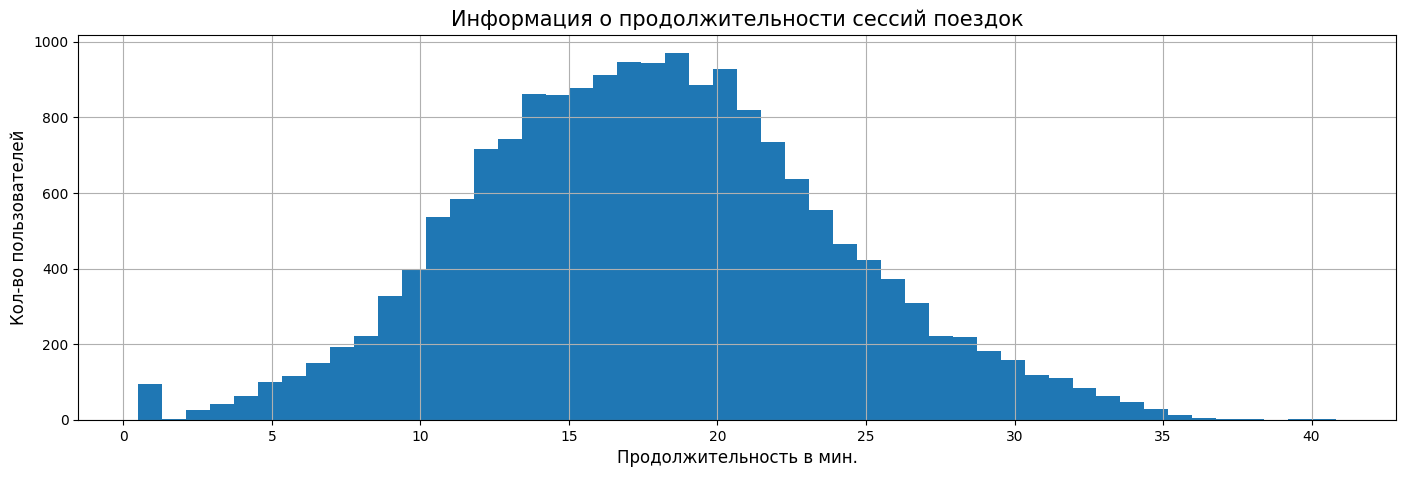

In [29]:
#визуализация параметров расстояния и продолжительности
rides[{'distance'}].hist(bins=50, figsize=(17,5))

plt.title("Информация о расстоянии поездок пользователей",fontsize=15)

plt.xlabel("Расстояние в м.",fontsize=12)
plt.ylabel("Кол-во пользователй",fontsize=12)

plt.show()

#визуализация параметров расстояния и продолжительности
rides[{'duration'}].hist(bins=50, figsize=(17,5))

plt.title("Информация о продолжительности сессий поездок",fontsize=15)

plt.xlabel("Продолжительность в мин.",fontsize=12)
plt.ylabel("Кол-во пользователей",fontsize=12)

plt.show()

При выводе графиков, показалось странным, что расстояние не прямо пропорционально продолжительности. Наблюдается фактор сезонности, однако он неравномерен. Опционально выведен график корреляции двух показателей.

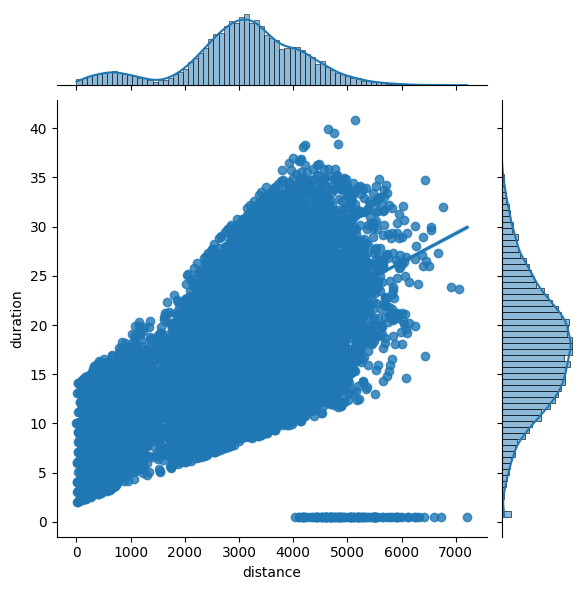

In [30]:
sns.jointplot(y='duration', x='distance', data=rides, kind='reg')
plt.show()

**Вывод:**  
Выявлено, что в сете представлено больше записей и данных о поездках в городе Пятигорск,
на втором месте - Санкт-Петербург, и самое мало кол-во данных о Москве. При этом больше всего пользователей представлено, которые не пользуются подпиской (однако доля всего лишь на 9% больше, или 136 пользователей).
Больше всего представлено пользователей в возрасте 25 лет. В целом наибольшая доля пользователей в возрасте от 21 до 28. Резкий спад по кол-ву идет после 35 лет.
Наибольшее расстояние достигается в 12 месяце (декабре), при этом миниум в 4 месяце (апреле). 2-ое место принадлежит июлю месяцу. В целом наблюдается небольшое влияние сезонности.
Самый высокий показатель продолжительности наблюдается в апреле, и минимум в феврале (второе "с конца" - сентябрь).  
Выявлено, что расстояние и продолжительность в целом имеют положительную корреляцию. Однако, "разброс" слишком большой (когда при меньшей продолжительности - большое расстояние)  
Пики в 700м. и 3100 м. могут быть обусловлены тем, что ряду пользователей необходимо просто доехать до ближайшего кафе\киоска, другим-интересно (проще) доехать до работы\учебного заведения\дома. Расстояния в таких случаях могут сильно различаться.

In [31]:
#изображение круговой диаграммы
name_category = i.index
values = i['user_id']

fig = go.Figure(data=[go.Pie(labels=name_category, values=values,hole=0.4)])

fig.update_layout(title='Результаты количества пользователей по городам',
                 height=450, width=600)

fig.update_traces(hoverinfo='label+percent+value', textinfo='value+percent', textfont_size=10)
fig.show()

В целом, распределение по городам пользователй равномерно, и учитывать разницу не имеет смысла.

#### Шаг 4. Объединение данных

In [32]:
#обединение данных о пользователях и поездках и подписках в один датафрейм
user_rides=pd.merge(users,rides,left_on='user_id', right_on='user_id', suffixes=('_user', '_rides' ))
#user_rides.head()
total_data=pd.merge(user_rides,subscriptions,left_on='subscription_type', right_on='subscription_type',
                    suffixes=('_user', '_subscr' ))
#total_data.head()

In [33]:
first_look (total_data)

Первые 10 строк


,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   num_month          18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

Статистика.Сводка


,user_id,age,distance,duration,num_month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,40.823963,12.000000,8.000000,50.000000,199.000000


Пропуски:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
num_month            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


 Процент пропусков


user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
distance             0.0
duration             0.0
date                 0.0
num_month            0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [34]:
rides.shape

(18068, 5)

In [35]:
users.shape

(1534, 5)

In [36]:
subscriptions.shape

(2, 4)

In [37]:
total_data.shape

(18068, 12)

Исходя из данных об объемах сетов, строки в объединенном сете совпадает по кол-ву строк у сета rides, который хранит данные о сессиях всех пользователей

In [38]:
#фрейм c данными о пользователях без подписки
free_data=total_data.query('subscription_type=="free"')
free_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [39]:
#фрейм с данными о пользователях с подпиской
ultra_data=total_data.query('subscription_type=="ultra"')
ultra_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [40]:
first_look (ultra_data)

Первые 10 строк


,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   num_month          6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


None

Статистика.Сводка


,user_id,age,distance,duration,num_month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


Пропуски:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
num_month            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


 Процент пропусков


user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
distance             0.0
duration             0.0
date                 0.0
num_month            0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [41]:
first_look (free_data)

Первые 10 строк


,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


Типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   num_month          11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


None

Статистика.Сводка


,user_id,age,distance,duration,num_month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


Пропуски:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
num_month            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


 Процент пропусков


user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
distance             0.0
duration             0.0
date                 0.0
num_month            0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

In [42]:
#расстояние, которое пользователь преодолел за одну поездку (без подписки)
q=free_data.groupby('num_month')['distance'].agg({'median'})
#продолжительность поездок (без подписки)
w=free_data.groupby('num_month')['duration'].agg({'median'})

In [43]:
fig = make_subplots(rows=2, cols=1,
 subplot_titles=['Медианное расстояние в мес.', 'Медианная продолжительность в мес.'])


fig.add_trace(go.Scatter(
            x=q.index,
            y=q['median'],
            text = q['median'],marker_color = '#024a70'),
              1, 1)
fig.add_trace(go.Scatter(
            x=w.index,
            y=w['median'],
            text = w['median'],marker_color = 'MediumPurple'),
              2, 1)

fig.update_layout(title='Информация о медианных расстоянии и времени поездок без подписки',
                 height=500, width=700,showlegend=False)

fig.update_xaxes(title='Номер месяца', col=1, row=1)
fig.update_xaxes(title='Номер месяца', col=1, row=2)
fig.update_yaxes(title='Расстояние в метрах', col=1, row=1)
fig.update_yaxes(title='Продолжительность в мин.', col=1, row=2)

fig.show()

<ipython-input-44-2af2b1370c43>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



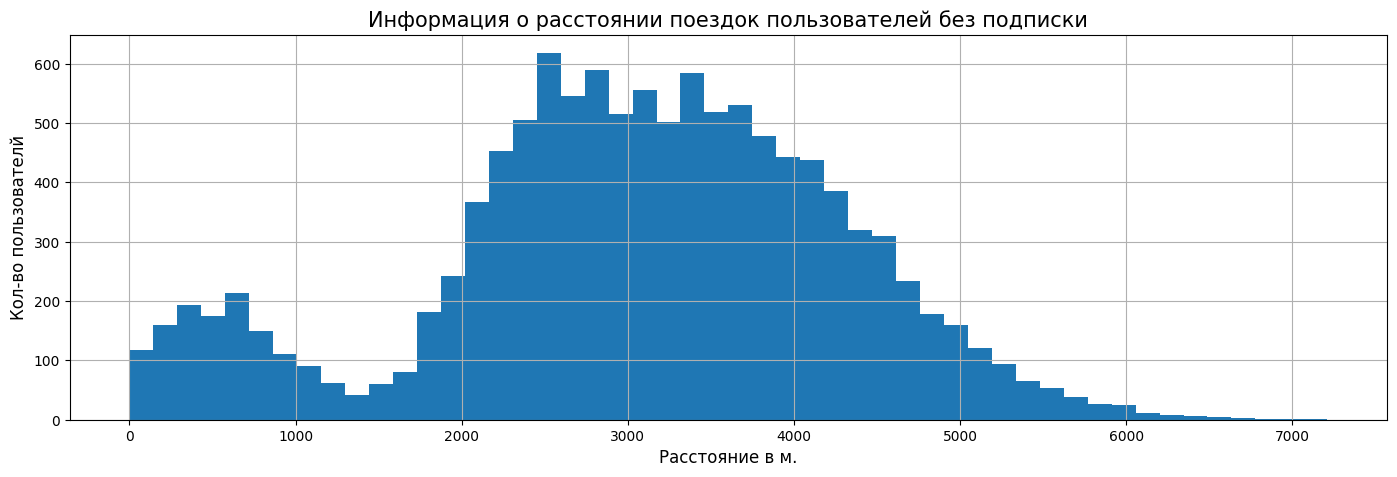

<ipython-input-44-2af2b1370c43>:12: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



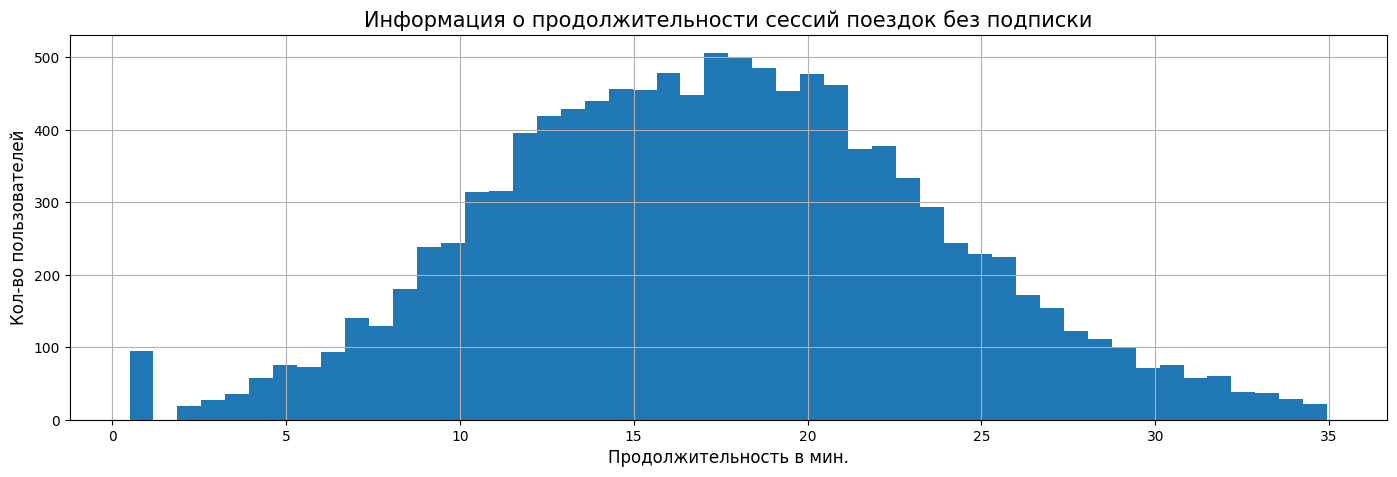

In [44]:
#визуализация параметров расстояния и продолжительности
free_data[{'distance'}].hist(bins=50, figsize=(17,5))

plt.title("Информация о расстоянии поездок пользователей без подписки",fontsize=15)

plt.xlabel("Расстояние в м.",fontsize=12)
plt.ylabel("Кол-во пользователй",fontsize=12)

plt.show()

#визуализация параметров расстояния и продолжительности
free_data[{'duration'}].hist(bins=50, figsize=(17,5))

plt.title("Информация о продолжительности сессий поездок без подписки",fontsize=15)

plt.xlabel("Продолжительность в мин.",fontsize=12)
plt.ylabel("Кол-во пользователей",fontsize=12)

plt.show()

In [45]:
#расстояние, которое пользователь преодолел за одну поездку (без подписки)
e=ultra_data.groupby('num_month')['distance'].agg({'median'})
#продолжительность поездок (без подписки)
r=ultra_data.groupby('num_month')['duration'].agg({'median'})

In [46]:
fig = make_subplots(rows=2, cols=1,
 subplot_titles=['Медианное расстояние в мес.', 'Медианная продолжительность в мес.'])


fig.add_trace(go.Scatter(
            x=e.index,
            y=e['median'],
            text = e['median'],marker_color = '#024a70'),
              1, 1)
fig.add_trace(go.Scatter(
            x=r.index,
            y=r['median'],
            text = r['median'],marker_color = 'MediumPurple'),
              2, 1)

fig.update_layout(title='Информация о расстоянии и времени поездок c подпиской',
                 height=500, width=700,showlegend=False)

fig.update_xaxes(title='Номер месяца', col=1, row=1)
fig.update_xaxes(title='Номер месяца', col=1, row=2)
fig.update_yaxes(title='Расстояние в метрах', col=1, row=1)
fig.update_yaxes(title='Продолжительность в мин.', col=1, row=2)

fig.show()

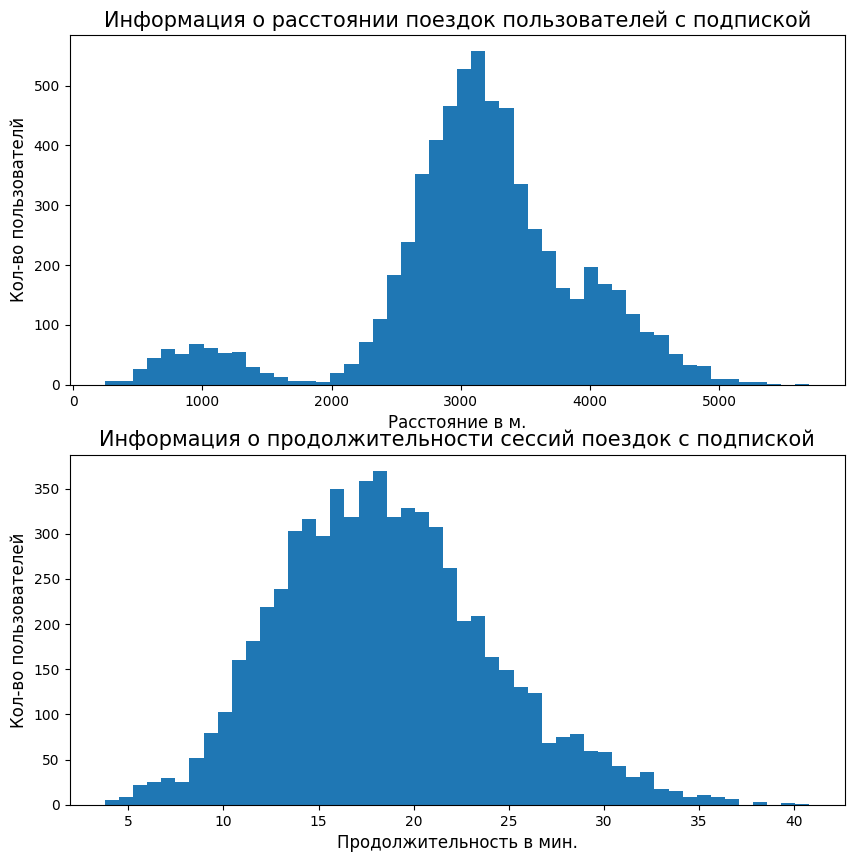

In [47]:
plt.figure(figsize=(10, 10))

    # !!! Две строки, 1 столбец.
    # !!! Текущая ячейка - 1
plt.subplot(2, 1, 1)
plt.hist(ultra_data['distance'],bins=50)
plt.title("Информация о расстоянии поездок пользователей с подпиской",fontsize=15)
plt.xlabel("Расстояние в м.",fontsize=12)
plt.ylabel("Кол-во пользователй",fontsize=12)

    # !!! Текущая ячейка - 2
plt.subplot(2, 1, 2)
plt.hist(ultra_data['duration'],bins=50)
plt.title("Информация о продолжительности сессий поездок с подпиской",fontsize=15)
plt.xlabel("Продолжительность в мин.",fontsize=12)
plt.ylabel("Кол-во пользователей",fontsize=12)
    # Покажем окно с нарисованным графиком
plt.show()

In [49]:
free_data

,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


<ipython-input-50-cbbc0a2f918b>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



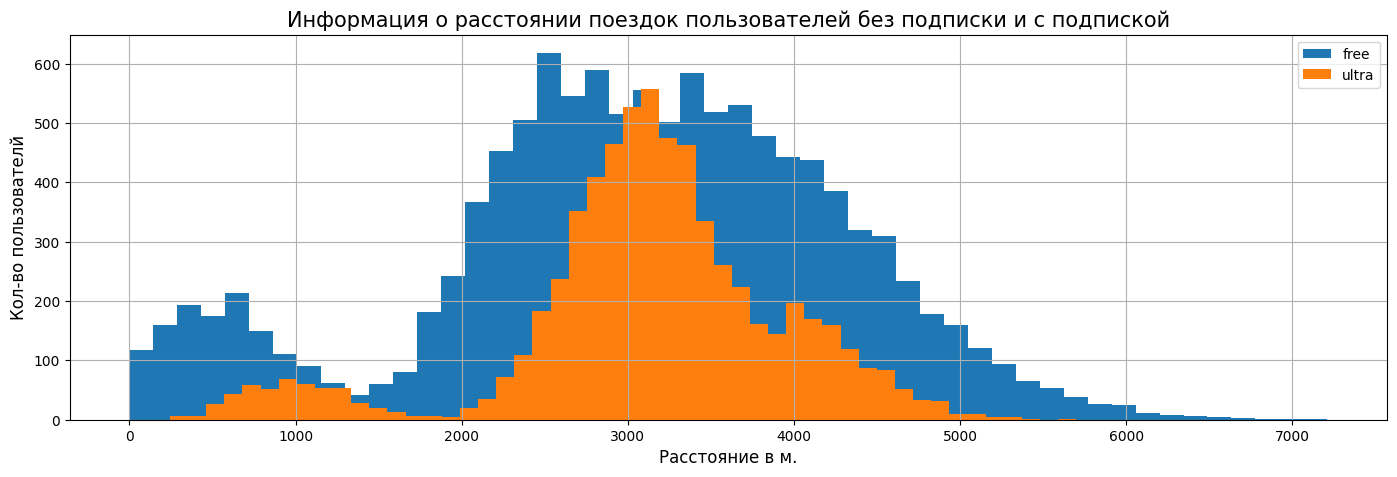

In [50]:

#визуализация параметров расстояния и продолжительности
free_data[{'distance'}].hist(bins=50, figsize=(17,5), label=free_data['subscription_type'])
ultra_data['distance'].hist(bins=50, figsize=(17,5), label=ultra_data['subscription_type'])
plt.title("Информация о расстоянии поездок пользователей без подписки и с подпиской",fontsize=15)

plt.xlabel("Расстояние в м.",fontsize=12)
plt.ylabel("Кол-во пользователй",fontsize=12)
plt.legend()

plt.show()

<ipython-input-51-e9da74d78660>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



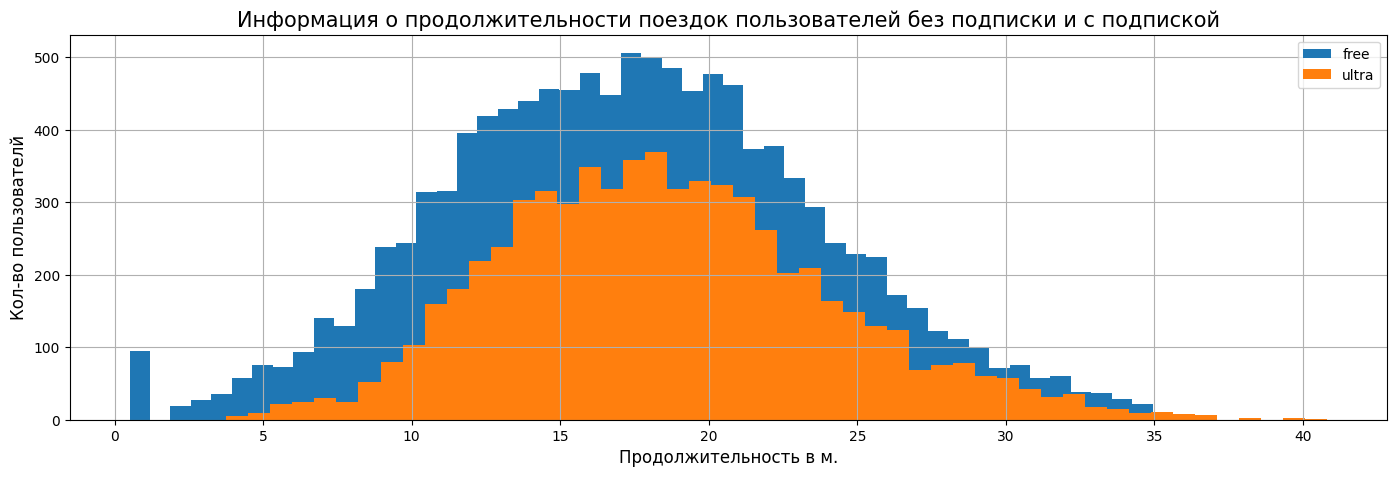

In [51]:
#визуализация параметров расстояния и продолжительности
free_data[{'duration'}].hist(bins=50, figsize=(17,5), label=free_data['subscription_type'])
ultra_data['duration'].hist(bins=50, figsize=(17,5), label=ultra_data['subscription_type'])
plt.title("Информация о продолжительности поездок пользователей без подписки и с подпиской",fontsize=15)

plt.xlabel("Продолжительность в м.",fontsize=12)
plt.ylabel("Кол-во пользователй",fontsize=12)
plt.legend()

plt.show()

**Вывод:**  
Был собран полный сет с информацией о пользователях, поездках и подписках. Созданы отдельны сеты с пользователями с подпиской и без.  
Выявлено, что пользователи без подписки меньше всего «проезжают» в октябре месяце, при этом пик максимального значения приходится на декабрь.  Стабильно высокие показатели по метражу продемонстрированы в период с мая по сентябрь. При этом продолжительность, в этот период более-менее стабильно высокая только в период с июня по июль, а в мае и сентябре имеют почти минимальные значения. Самая высокая продолжительность достигнута в декабре (что соответствует высокому значению метража).  
Пиковое значение по расстоянию для группы пользователей с подпиской приходится на июль, минимальное – на апрель. При этом среднее значение приходится на декабрь. Однако на этот же период (на декабрь) приходится на минимум по продолжительности. Пиковые максимальные значения по продолжительности приходятся на июль и август, минимум – июнь.
Возможно предположить, что в декабре действует комплекс акций, который позволяет пользователям пользоваться сервисом без подписки больше и чаще.  
В целом, выявлено что большинство пользователей пользуются приложением без подписки и расстояние преодолевают больше, чем людей с подпиской. В целом, аналогично по времени продолжительности сессий.

#### Шаг 5. Подсчёт выручки

In [52]:
first_look (total_data)

Первые 10 строк


,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   num_month          18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

Статистика.Сводка


,user_id,age,distance,duration,num_month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,40.823963,12.000000,8.000000,50.000000,199.000000


Пропуски:



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
num_month            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


 Процент пропусков


user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
distance             0.0
duration             0.0
date                 0.0
num_month            0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [53]:
#новый дата, с округлением минут поездок
total_data['duration'] = np.ceil(total_data['duration'])
total_data.tail()

,user_id,name,age,city,subscription_type,distance,duration,date,num_month,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,16.0,2021-12-29,12,8,50,0


In [54]:
#датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными
agg_df=total_data.groupby(['user_id','num_month']).agg({'distance':['sum','count'], 'duration':'sum','minute_price':'max',
                                                        'subscription_fee':'first',
                                                       'start_ride_price':'first',
                                                       'subscription_type':'first'})
agg_df.columns = ['sum_distance', 'count_rides','sum_duration','minute_price',
                  'subscription_fee','start_ride_price','subscription_type']
agg_df.head()

sum_distance  count_rides  sum_duration  minute_price  \
user_id num_month                                                          
1       1           7027.511294            2          42.0             6   
        4            754.159807            1           7.0             6   
        8           6723.470560            2          46.0             6   
        10          5809.911100            2          32.0             6   
        11          7003.499363            3          56.0             6   

                   subscription_fee  start_ride_price subscription_type  
user_id num_month                                                        
1       1                       199                 0             ultra  
        4                       199                 0             ultra  
        8                       199                 0             ultra  
        10                      199                 0             ultra  
        11                      199                 0             ultra

In [55]:
first_look (agg_df)

Первые 10 строк


sum_distance  count_rides  sum_duration  minute_price  \
user_id num_month                                                          
1       1           7027.511294            2          42.0             6   
        4            754.159807            1           7.0             6   
        8           6723.470560            2          46.0             6   
        10          5809.911100            2          32.0             6   
        11          7003.499363            3          56.0             6   
        12          6751.629942            2          28.0             6   
2       3          10187.723006            3          63.0             6   
        4           6164.381824            2          40.0             6   
        6           3255.338202            1          14.0             6   
        7           6780.722964            2          48.0             6   

                   subscription_fee  start_ride_price subscription_type  
user_id num_month                                                        
1       1                       199                 0             ultra  
        4                       199                 0             ultra  
        8                       199                 0             ultra  
        10                      199                 0             ultra  
        11                      199                 0             ultra  
        12                      199                 0             ultra  
2       3                       199                 0             ultra  
        4                       199                 0             ultra  
        6                       199                 0             ultra  
        7                       199                 0             ultra

Типы данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sum_distance       11331 non-null  float64
 1   count_rides        11331 non-null  int64  
 2   sum_duration       11331 non-null  float64
 3   minute_price       11331 non-null  int64  
 4   subscription_fee   11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_type  11331 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 665.0+ KB


None

Статистика.Сводка


,sum_distance,count_rides,sum_duration,minute_price,subscription_fee,start_ride_price
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,4896.362584,1.594564,29.186127,7.199894,79.610537,29.997352
std,2911.516556,0.831604,16.752464,0.979861,97.496144,24.496519
min,2.570787,1.000000,1.000000,6.000000,0.000000,0.000000
25%,2972.202146,1.000000,17.000000,6.000000,0.000000,0.000000
50%,3988.723985,1.000000,24.000000,8.000000,0.000000,50.000000
75%,6421.375890,2.000000,38.000000,8.000000,199.000000,50.000000
max,23429.487786,7.000000,143.000000,8.000000,199.000000,50.000000


Пропуски:



sum_distance         0
count_rides          0
sum_duration         0
minute_price         0
subscription_fee     0
start_ride_price     0
subscription_type    0
dtype: int64


 Процент пропусков


sum_distance         0.0
count_rides          0.0
sum_duration         0.0
minute_price         0.0
subscription_fee     0.0
start_ride_price     0.0
subscription_type    0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [56]:
full_agg_df=agg_df

In [57]:
#функция для подсчета выручки
def revenue_sum(row):
    if row['subscription_type']=='ultra':
        revenue=row['subscription_fee']+row['minute_price']*row['sum_duration']
    elif row['subscription_type']=='free':
        revenue=row['subscription_fee']+row['minute_price']*row['sum_duration']+row['start_ride_price']*row['count_rides']
    return revenue

In [58]:
#готовый фрейм с помесячной выручкой
full_agg_df['revenue']=full_agg_df.apply(revenue_sum, axis=1)
full_agg_df

sum_distance  count_rides  sum_duration  minute_price  \
user_id num_month                                                          
1       1           7027.511294            2          42.0             6   
        4            754.159807            1           7.0             6   
        8           6723.470560            2          46.0             6   
        10          5809.911100            2          32.0             6   
        11          7003.499363            3          56.0             6   
...                         ...          ...           ...           ...   
1534    6           3409.468534            2          26.0             8   
        8           7622.453034            2          48.0             8   
        9           4928.173852            1          23.0             8   
        11         13350.015305            4          78.0             8   
        12          2371.711192            1          16.0             8   

                   subscription_fee  start_ride_price subscription_type  \
user_id num_month                                                         
1       1                       199                 0             ultra   
        4                       199                 0             ultra   
        8                       199                 0             ultra   
        10                      199                 0             ultra   
        11                      199                 0             ultra   
...                             ...               ...               ...   
1534    6                         0                50              free   
        8                         0                50              free   
        9                         0                50              free   
        11                        0                50              free   
        12                        0                50              free   

                   revenue  
user_id num_month           
1       1            451.0  
        4            241.0  
        8            475.0  
        10           391.0  
        11           535.0  
...                    ...  
1534    6            308.0  
        8            484.0  
        9            234.0  
        11           824.0  
        12           178.0  

[11331 rows x 8 columns]

Были созданы 4 фрейма:полный, включающий в себя данные о поздках и тарифах пользователей. 2 сета включающие в себя пользователей оформившие подписку и нет соответственно, и сет, с данными по месячной выручкой от каждого пользователя.

In [59]:
full_agg_df['revenue'].sum()

3878641.0

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.  
Нулевая гипотеза: пользователи с подпиской и без проводят время одиннаково.  
Альтернативная гипотеза: пользователи с подпиской больше времени тратят на поездки   

In [60]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
ultra =total_data.query('subscription_type=="ultra"')['duration']

# траты второй группы пользователей (без подписки)
free = total_data.query('subscription_type=="free"')['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra, free,  equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


<ipython-input-61-e9da74d78660>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



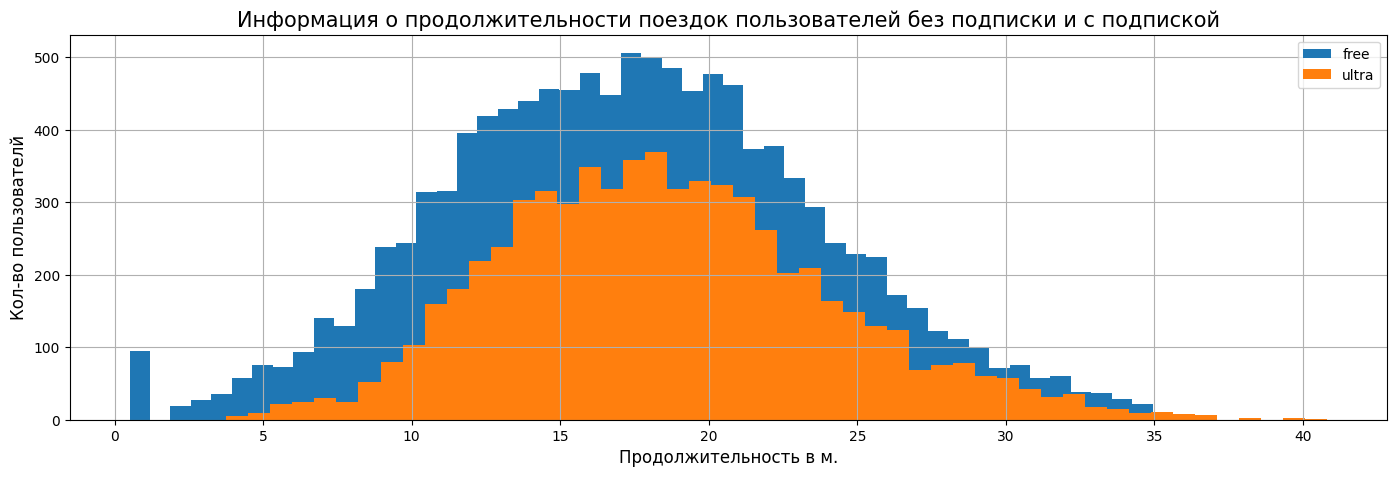

In [61]:
#визуализация параметров расстояния и продолжительности
free_data[{'duration'}].hist(bins=50, figsize=(17,5), label=free_data['subscription_type'])
ultra_data['duration'].hist(bins=50, figsize=(17,5), label=ultra_data['subscription_type'])
plt.title("Информация о продолжительности поездок пользователей без подписки и с подпиской",fontsize=15)

plt.xlabel("Продолжительность в м.",fontsize=12)
plt.ylabel("Кол-во пользователй",fontsize=12)
plt.legend()

plt.show()

Пользователи с подпиской меньше тратят время на поездки

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  
Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.  
Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [62]:
less_3130 = total_data.query('subscription_type=="ultra"')['distance']

metrs = 3130

alpha = 0.05

results = st.ttest_1samp(
    less_3130,
    metrs,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Среднее расстояние которое проезжают пользователи с подпиской не превышает 3130 метров. Это выгодно бизнесу. Износа не будет.

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.   
Нулевая гипотеза: средние значения трат пользователей из двух групп равны.  
Альтернативная гипотеза: среднее значение трат пользователей с подпиской больше, чем среднее значение трат пользователей без подписки

In [63]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
ultra =full_agg_df.query('subscription_type=="ultra"')['revenue']

# траты второй группы пользователей (без подписки)
free = full_agg_df.query('subscription_type=="free"')['revenue']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra, free,equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Вероятно, пользователи с "подпиской" тратят денег больше и они выгоднее для компании.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**  
Старая и новая совокупности называются зависимыми, или парными. Чтобы сравнить их средние, используют функцию stats.ttest_rel, а методу scipy.stats.ttest_rel() передают параметры с наборами данных до и после изменения.  
Вероятно, это одностроняя гипотеза (важно же изменение в одну сторону).

#### Шаг 7. Выводы

Представлено 3 сета с данными. При предварительном просмотре, выявлено, что во всех сетах отсутствуют пропущенные значения. Дубликаты обнаружены только в сете users.  
Были проанализированы и исключены дубликаты в сете users. Выявлены и обработаны аномалии в сете rides ( было допущено, что поездка не может быть меньше 1 минуты и меньше 150 метров). После всех преобразований произведены сравнения объемов сетов "до/после" обработки, для выявления критичности отсечения данных.    
Данные date были переведы в соответствующий формат, и добавлен номер месяца.  
Выявлено, что в сете представлено больше записей и данных о поездках в городе Пятигорск,
на втором месте - Санкт-Петербург, и самое мало кол-во данных о Москве. При этом больше всего пользователей представлено, которые не пользуются подпиской (однако доля всего лишь на 9% больше, или 136 пользователей).  
Больше всего представлено пользователей в возрасте 25 лет. В целом наибольшая доля пользователей в возрасте от 21 до 28. Резкий спад по кол-ву идет после 35 лет.  
Наибольшее расстояние достигается в 12 месяце (декабре), при этом минимум в 4 месяце (апреле). 2-ое место принадлежит июлю месяцу. В целом наблюдается небольшое влияние сезонности.  
Самый высокий показатель продолжительности наблюдается в апреле, и минимум в феврале (второе "с конца" - сентябрь).    
Выявлено, что расстояние и продолжительность в целом имеют положительную корреляцию. Однако, "разброс" слишком большой (когда при меньшей продолжительности - большое расстояние)  
Был собран полный сет с информацией о пользователях, поездках и подписках. Созданы отдельны сеты с пользователями с подпиской и без.    
Выявлено, что пользователи без подписки меньше всего «проезжают» в октябре месяце, при этом пик максимального значения приходится на декабрь.  Стабильно высокие показатели по метражу продемонстрированы в период с мая по сентябрь. При этом продолжительность, в этот период более-менее стабильно высокая только в период с июня по июль, а в мае и сентябре имеют почти минимальные значения. Самая высокая продолжительность достигнута в декабре (что соответствует высокому значению метража).    
Пиковое значение по расстоянию для группы пользователей с подпиской приходится на июль, минимальное – на апрель. При этом среднее значение приходится на декабрь. Однако на этот же период (на декабрь) приходится на минимум по продолжительности. Пиковые максимальные значения по продолжительности приходятся на июль и август, минимум – июнь.  
Возможно предположить, что в декабре действует комплекс акций, который позволяет пользователям пользоваться сервисом без подписки больше и чаще.  
В целом, выявлено что большинство пользователей пользуются приложением без подписки и расстояние преодолевают больше, чем людей с подпиской. В целом, аналогично по времени продолжительности сессий.  
Были предложен ряд гипотез, из результатов которых следует,что:
Пользователи с подпиской меньше тратят время на поездки, чем пользователи с подпиской  
Среднее расстояние которое проезжают пользователи с подпиской превышает 3130 метров.  
Вероятно, пользователи с "подпиской" тратят денег больше и они выгоднее для компании.
